# Multi-Layer Perceptron Implementation

### by S Vishakan, CSE - C, 18 5001 196

In [15]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, balanced_accuracy_score

from warnings import filterwarnings    #to ignore MLP warnings for no convergence
filterwarnings('ignore')

In [16]:
from sklearn.datasets import load_wine

In [17]:
data = load_wine()
columns = data.feature_names
targets = np.array(data.target)

data = pd.DataFrame(data.data, columns=data.feature_names)
targets = pd.DataFrame(targets, columns=['class'])
frames = [data, targets]
dataset = pd.concat(frames, axis = 1)

In [18]:
print(dataset.head())

   alcohol  malic_acid  ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71 2.43              15.60     127.00           2.80   
1    13.20        1.78 2.14              11.20     100.00           2.65   
2    13.16        2.36 2.67              18.60     101.00           2.80   
3    14.37        1.95 2.50              16.80     113.00           3.85   
4    13.24        2.59 2.87              21.00     118.00           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  hue  \
0        3.06                  0.28             2.29             5.64 1.04   
1        2.76                  0.26             1.28             4.38 1.05   
2        3.24                  0.30             2.81             5.68 1.03   
3        3.49                  0.24             2.18             7.80 0.86   
4        2.69                  0.39             1.82             4.32 1.04   

   od280/od315_of_diluted_wines  proline  class  
0                       

In [19]:
print("Number of Samples:", len(dataset))
print("\nNumber of Classes:")
print(dataset['class'].value_counts())

Number of Samples: 178

Number of Classes:
1    71
0    59
2    48
Name: class, dtype: int64


In [20]:
pd.set_option('float_format', '{:.2f}'.format)
dataset.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,2.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


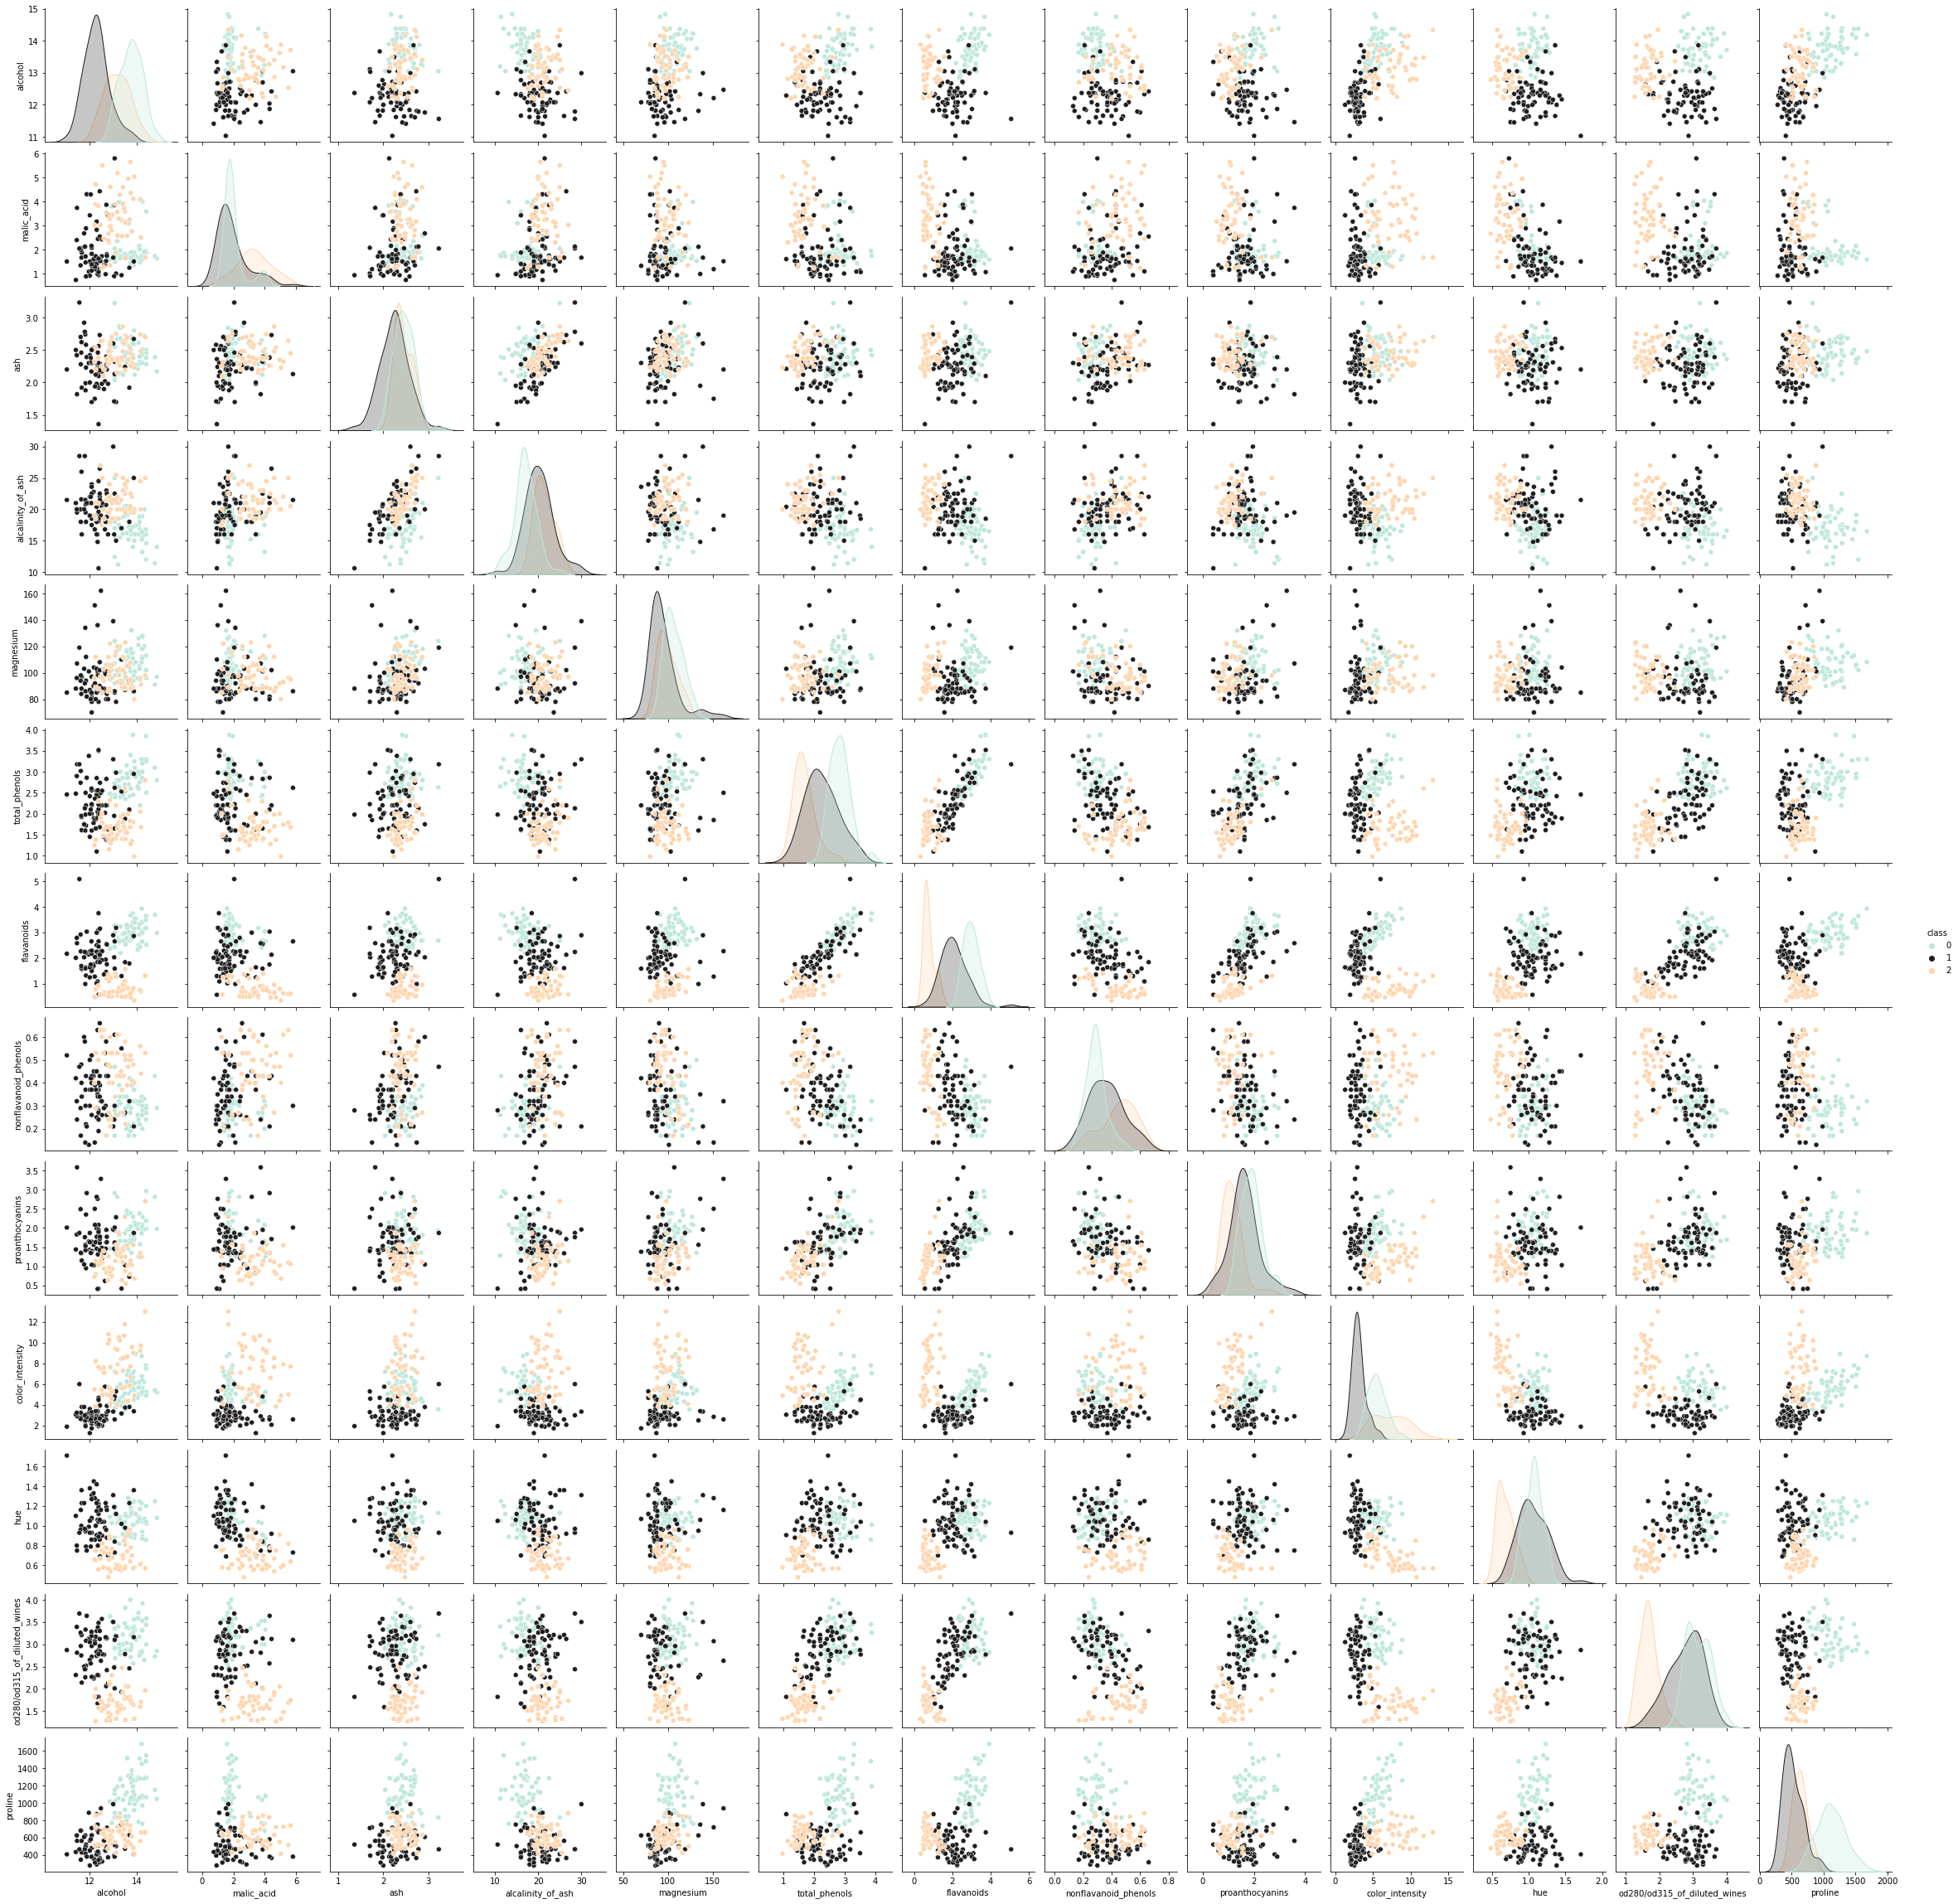

In [7]:
sns.pairplot(dataset, hue='class', palette='icefire')

In [21]:
print("Columns:\n",columns)

Columns:
 ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [22]:
x = np.array(dataset[['alcohol','flavanoids', 'ash']])
y = np.array(dataset['class'])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [24]:
mlp = MLPClassifier(activation='tanh', solver='sgd')
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_test)

In [25]:
print("Accuracy: {0} %".format(round(100 * float(accuracy_score(y_test,y_pred)), 2)))
print("Precision: {0} %".format(round(100 * float(precision_score(y_test, y_pred, average="weighted")), 2)))

Accuracy: 83.33 %
Precision: 84.56 %


In [26]:
confusion_matrix(y_test, y_pred)

array([[18,  1,  0],
       [ 6, 15,  1],
       [ 0,  1, 12]])

In [27]:
bas = round(balanced_accuracy_score(y_test, y_pred) * 100, 2)

print("Balanced Accuracy Score:", bas, "%")

Balanced Accuracy Score: 85.08 %
